# Python's poroelasticity toolbox

# Terzaghi's problem

In Terzaghi’s original theoretical work, which was inspired by the measurements of delayed deformations in a compression test on a clay sample, the pore fluid and the soil particles were both assumed to be incompressible, so that the only mechanism of deformation was a rearrangement of the particles. In modern presentations, these assumptions are no longer made, and this generalised theory will be used here. The relevant parameters used in this model are listed here


Hydraulic properties

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Hydraulic conductivity | $k$ | 1.0E-4  | $m$/$s$ |
| Porosity | $n$ | 0.2 | - |

Mechanical properties

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Shear modulus | $G$ | 6.9E7 | $Pa$ |
| Bulk modulus| $K$ | 1.0E7 | $Pa$ |
| Biot's coefficient | $\alpha$ | 0.9 | - |

Fluid properties

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Water bulk modulus| $K_f$ | 2.2E7 | $Pa$ |
| Volumetric weigth | $\gamma$ | 1.0E4 | $m$/$s$  |

System's characteristics

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Load| $q$ | 1.0E3 | $Pa$ |
| System's depth | $h$ | 1.0E2 | $m$ |
| time| $t$ | - | $s$ |



In [1]:
from PoroElasticity_functions import *

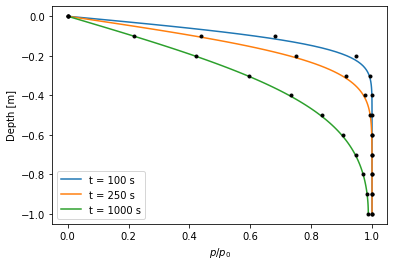

In [2]:
### ---------------------------------------------------------
# Analytical solution

# Hydraulic parameters of the soil
k = 1E-4 # Permeability
n = 0.2 # Porosity

# Mechanical parameters of the soil
G = 6.9E7 # Shear modulus of the soil
K = 1.0E7 # Bulk modulus of the soil
a = 0.9 # Biot's coefficient

# Water parameters
K_f = 2.2E9 # Bulk modulus of the fluid
y = 1E4 # Volumetric weigth of fluid

#System's characteristics
q = 1000 # Load
h = 100 # Depth of the system

# Compute poroelasticity constants
S = Biot_modulus(n, K, a, K_f)
m_v = Confined_compressibility(K, G)
c_v = Consolidation_coeff(k, a, y, S, m_v)
p_0 = Initial_condition(a, S, m_v, q)

# Compute solution for given times
t = [100, 250, 1000]

# Call function
p, z = Terzaghis_problem(c_v, t, h)

# Plot
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
for i, time in enumerate(t):
    ax.plot(p[:,i], z, label='t = ' + str(time) + ' s')
    
ax.legend()
ax.set_xlabel('$p/p_0$')
ax.set_ylabel('Depth [m]');

### ---------------------------------------------------------
### ---------------------------------------------------------
# Numerical solution
import pandas as pd

df = pd.read_csv('Numerical_solutions/gold/Terzaghis_problem.csv')
idx = [2, 5, 20] # Indices where the solution is found
point_val = np.linspace(-1, 0, 11) # Space array
for i in idx:
    plt.plot(df.iloc[i][1:] / p_0, point_val, 'ko', markersize=3)
    
### ---------------------------------------------------------

If two layers are considerated, with different hydraulic conductivities, the solution of A.Verruijt (2018) always converges. Here is necessary enter the Biot modulus, confined compressibility as well as the hydraulic conductivites to the main function

Hydraulic properties

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Hydraulic conductivity 1| $k_1$ | 1.0E-3  | $m$/$s$ |
| Hydraulic conductivity 2| $k_2$ | 1.0E-4  | $m$/$s$ |

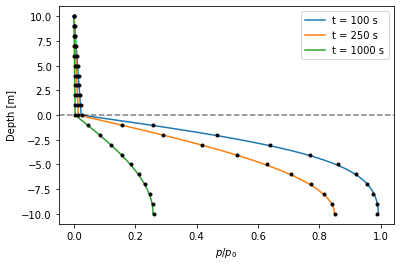

In [3]:
### ---------------------------------------------------------
# Analytical solution

# Hydraulic parameters of the soil
k = np.array([1E-3, 1E-5]) # Permeability
n = 0.2 # Porosity

# Mechanical parameters of the soil
G = 6.9E7 # Shear modulus of the soil
K = 1.0E7 # Bulk modulus of the soil
a = 0.9 # Biot's coefficient

# Water parameters
K_f = 2.2E9 # Bulk modulus of the fluid
y = 1E4 # Volumetric weigth of fluid

#System's characteristics
q = 1000 # Load

# Water parameters
K_f = 2.2E9 # Bulk modulus of the fluid
y = 1E4 # Volumetric weigth of fluid

#System's characteristics
q = 1000 # Load
h = [10, 10] # Depth of the system
t = [100, 250, 1000] # Time where the solution is computed

# Compute poroelasticity constants
S = Biot_modulus(n, K, a, K_f)
m_v = Confined_compressibility(K, G)
c_v = Consolidation_coeff(k, a, y, S, m_v)
p_0 = Initial_condition(a, S, m_v, q)

# Call function
p, Z = Tezaghis_problem_two_layers(c_v, t, h, S, a, m_v, k)

#Plot
fig, ax = plt.subplots()
for i, time in enumerate(t):
    ax.plot(p[:,i], Z[:,i], label='t = ' + str(time) + ' s')

ax.axhline(y=0,linestyle='--',color='k',alpha=.5)
ax.legend()
ax.set_xlabel('$p/p_0$')
ax.set_ylabel('Depth [m]')

### ---------------------------------------------------------
### ---------------------------------------------------------
# Numerical solution

df = pd.read_csv('Numerical_solutions/gold/Terzaghis_problem_2_layers.csv')
idx = [10, 25, 100] # Indices where the solution is found
point_val = np.linspace(-10, 10, 21) # Space array
for i in idx:
    plt.plot(df.iloc[i][1:] / p_0, point_val, 'ko', markersize=3)
    
### ---------------------------------------------------------

This toolbox also allows the use of multilayers for some initial condition and mixed boundary conditions, 

$$a_1 P  + b_1 \frac{\partial P}{\partial z} = c_1 \quad x=x_0$$
$$a_2 P  + b_2 \frac{\partial P}{\partial z} = c_2 \quad x=x_1$$

Where a, b and c are vectors defined by the user and P is pressure. To do so, is needed to install chebfun first (https://github.com/olivierverdier/pychebfun)


Hydraulic properties

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Hydraulic conductivity 1| $k_1$ | 1.0E-3  | $m$/$s$ |
| Porosity 1| $n_1$ | 0.3 | - |
| Hydraulic conductivity 2| $k_2$ | 1.0E-4  | $m$/$s$ |
| Porosity 2| $n_2$ | 0.25 | - |
| Hydraulic conductivity 3| $k_3$ | 1.0E-6  | $m$/$s$ |
| Porosity 3| $n_3$ | 0.2 | - |

Mechanical properties

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Shear modulus 1| $G_1$ | 6.0E7 | $Pa$ |
| Bulk modulus 1| $K_1$ | 1.0E7 | $Pa$ |
| Biot's coefficient 1| $\alpha_1$ | 0.9 | - |
| Shear modulus 2| $G_2$ | 7.0E7 | $Pa$ |
| Bulk modulus 2| $K_2$ | 2.5E7 | $Pa$ |
| Biot's coefficient 2| $\alpha_2$ | 0.8 | - |
| Shear modulus 3| $G_3$ | 8.0E7 | $Pa$ |
| Bulk modulus 3| $K_3$ | 1.0E7 | $Pa$ |
| Biot's coefficient 3| $\alpha_3$ | 0.6 | - |


Fluid properties

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Water bulk modulus| $K_f$ | 2.2E7 | $Pa$ |
| Volumetric weigth | $\gamma$ | 1.0E4 | $m$/$s$  |

System's characteristics

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| System's depth | $h$ | 30.0 | $m$ |
| Thickness layer 1 | $h_1$ | 10.0 | $m$ |
| Thickness layer 2 | $h_2$ | 10.0 | $m$ |
| Thickness layer 3  | $h_3$ | 10.0 | $m$ |
| time| $t$ | - | $s$ |

The solution is based on Hickson et al., (2009). However, as discussed by Carr E.J., et al., (2018), the solution may not always converges. If that is the case, try different values for the 'n_serie' parameter untill find convergence.

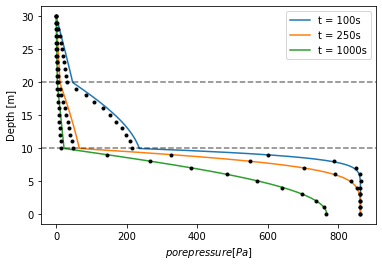

In [4]:
### ---------------------------------------------------------
# Analytical solution

# Hydraulic parameters of the soil
k = np.array([1E-3, 1E-4, 1E-6]) # Permeability
n = np.array([0.3, 0.25, 0.2]) # Porosity

# Mechanical parameters of the soil
G = np.array([6.0E7, 7.0E7, 8.0E7]) # Shear modulus of the soil
K = np.array([1.0E7, 2.5E7, 5.0E7]) # Bulk modulus of the soil
alpha = np.array([0.9, 0.9, 0.9]) # Biot's coefficient

# Water parameters
K_f = 2.2E9 # Bulk modulus of the fluid
y = 1.0E4 # Volumetric weigth of fluid

q = 1000 # Load

# Compute poroelasticity constants
S = Biot_modulus(n, K, alpha, K_f)
m_v = Confined_compressibility(K, G)
c_v = Consolidation_coeff(k, alpha, y, S, m_v) # Consolidation coeffcient
p_0 = Initial_condition(alpha, S, m_v, q) # Initial conditions in each layer

t = [100, 250, 1000] # Time where the solution is computed
h = [-10, 20] # Top and bottom of your model
m = 3 # Number of layers
l = [10, 10, 10] # Length of the layers
a = [1.0 , 0.0] # Mixed boundary conditions, Dirichet
b = [0.0, 1.0] # Mixed boundary conditions, Neumann
c = [0.0, 0.0] # Mixed boundary conditions, value

p, z = Terzaghis_problem_multi(c_v, t, h, m, l, a, b, c, p_0, n_serie = 1.7, space_sol = None)

# Plot

fig, ax = plt.subplots()
for i, time in enumerate(t):
    ax.plot(p[:,i], z[::-1], label='t = ' + str(time) + 's')
    
ax.axhline(y=10,linestyle='--',color='k',alpha=.5)
ax.axhline(y=20,linestyle='--',color='k',alpha=.5)
ax.legend()
ax.set_xlabel('$pore pressure [Pa]$')
ax.set_ylabel('Depth [m]');

### ---------------------------------------------------------
### ---------------------------------------------------------
# Numerical solution

df = pd.read_csv('Numerical_solutions/gold/Terzaghis_problem_multy_layers.csv')
idx = [10, 25, 100]
point_val = np.linspace(0, 30, 31)
for i in idx:
    plt.plot(df.iloc[i][1:], point_val, 'ko', markersize=3)
    
### ---------------------------------------------------------

A variant case occurs when the system is stressed with a preiodic load at its upper surface. The lower boundary is impermeable, and the upper boundary is fullydrained. The vertical load is expressed as

$$\sigma_{zz} = q sin^2 \frac{\pi t}{t_0}$$

and

$$q_s = \frac{\alpha m_v}{S + \alpha^2 m_v}$$

Hydraulic properties

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Hydraulic conductivity | $k$ | 1.0E-4  | $m$/$s$ |
| Porosity | $n$ | 0.2 | - |

Mechanical properties

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Shear modulus | $G$ | 6.9E7 | $Pa$ |
| Bulk modulus| $K$ | 1.0E7 | $Pa$ |
| Biot's coefficient | $\alpha$ | 0.9 | - |

Fluid properties

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Water bulk modulus| $K_f$ | 2.2E7 | $Pa$ |
| Volumetric weigth | $\gamma$ | 1.0E4 | $m$/$s$  |

System's characteristics

| Parameter | Symbol | Value | Unit $\qquad$ | 
| :--- | :---: | :---:         |:---| 
| Load| $q$ | 1.0E3 | $Pa$ |
| System's depth | $h$ | 1.0E3 | $m$ |
| time| $t$ | - | $s$ |

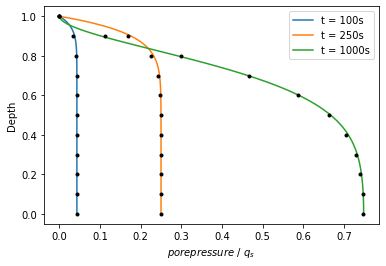

In [5]:
### ---------------------------------------------------------
# Analytical solution

# Hydraulic parameters of the soil
k = 1E-4 # Permeability
n = 0.2 # Porosity

# Mechanical parameters of the soil
G = 6.9E7 # Shear modulus of the soil
K = 1.0E7 # Bulk modulus of the soil
a = 0.9 # Biot's coefficient

# Water parameters
K_f = 2.2E9 # Bulk modulus of the fluid
y = 1E4 # Volumetric weigth of fluid

#System's characteristics
q = 1000 # Load
h = 100 # Depth of the system
t_0 = 1500
t = [100, 250, 1000] # Time where the solution is computed

# Compute poroelasticity constants
S = Biot_modulus(n, K, a, K_f)
m_v = Confined_compressibility(K, G)
c_v = Consolidation_coeff(k, a, y, S, m_v)
p_0 = Initial_condition(a, S, m_v, q)

p, z = Terzaghis_harmonic_load(c_v, t, h, t_0, n_serie = None)

# Plot

fig, ax = plt.subplots()
for i, time in enumerate(t):
    ax.plot(p[:,i], z, label='t = ' + str(time) + 's')
    
ax.legend()
ax.set_xlabel('$pore pressure$ / $q_s$')
ax.set_ylabel('Depth');

### ---------------------------------------------------------
### ---------------------------------------------------------
# Numerical solution

df = pd.read_csv('Numerical_solutions/gold/Terzaghis_problem_harmonic.csv')
idx = [2, 5, 20]
point_val = np.linspace(0, 1, 11)
for i in idx:
    plt.plot(df.iloc[i][1:] / p_0, point_val, 'ko', markersize=3)
    
### ---------------------------------------------------------

# References

Carr, E. J., & March, N. G. (2018). Semi-analytical solution of multilayer diffusion problems with time-varying boundary conditions and general interface conditions. Applied Mathematics and Computation, 333, 286-303.

Hickson, R. I., Barry, S. I., & Mercer, G. N. (2009). Critical times in multilayer diffusion. Part 1: Exact solutions. International Journal of Heat and Mass Transfer, 52(25-26), 5776-5783.

Verruijt, A. (2018). Numerical and analytical solutions of poroelastic problems. Geotechnical Research, 5(1), 39-50.